In [9]:
# be sure to get the data from kaggle and unzip it before continuing

import numpy as np
from numpy import load
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [10]:
data = load('./cuboulder-image-labelling/train_and_test.npz')

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']

lst = data.files
for item in lst:
    print(item)
#     print(data[item])

FileNotFoundError: [Errno 2] No such file or directory: './cuboulder-image-labelling/train_and_test.npz'

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(39209, 32, 32, 3)
(39209, 43)
(12630, 32, 32, 3)


In [4]:
print(len(X_train))
print(X_train[0].shape)
print(X_train[0])

39209
(32, 32, 3)
[[[ 75  78  80]
  [ 74  76  78]
  [ 83  84  83]
  ...
  [ 67  74  73]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 82  83  85]
  [ 80  80  82]
  [ 87  86  83]
  ...
  [ 73  77  77]
  [ 75  77  75]
  [ 79  79  77]]

 [[ 79  79  81]
  [ 84  83  85]
  [ 91  88  89]
  ...
  [ 72  74  72]
  [ 74  75  71]
  [ 78  78  74]]

 ...

 [[126 128 133]
  [118 123 128]
  [108 117 120]
  ...
  [ 96  96  90]
  [ 99 101  94]
  [ 99 103  99]]

 [[ 90  94  98]
  [ 91  97 103]
  [ 77  87  92]
  ...
  [104 104  97]
  [107 111 102]
  [ 95 103  97]]

 [[ 85  84  87]
  [ 93  99 104]
  [ 69  80  85]
  ...
  [101 102  94]
  [ 98 101  90]
  [ 90  97  89]]]


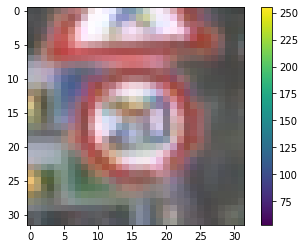

In [5]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
X_train = X_train / 255.0 # we have to scale them down 

In [7]:
print(X_train[0])

[[[0.29411765 0.30588235 0.31372549]
  [0.29019608 0.29803922 0.30588235]
  [0.3254902  0.32941176 0.3254902 ]
  ...
  [0.2627451  0.29019608 0.28627451]
  [0.25490196 0.27058824 0.26666667]
  [0.25882353 0.2627451  0.25882353]]

 [[0.32156863 0.3254902  0.33333333]
  [0.31372549 0.31372549 0.32156863]
  [0.34117647 0.3372549  0.3254902 ]
  ...
  [0.28627451 0.30196078 0.30196078]
  [0.29411765 0.30196078 0.29411765]
  [0.30980392 0.30980392 0.30196078]]

 [[0.30980392 0.30980392 0.31764706]
  [0.32941176 0.3254902  0.33333333]
  [0.35686275 0.34509804 0.34901961]
  ...
  [0.28235294 0.29019608 0.28235294]
  [0.29019608 0.29411765 0.27843137]
  [0.30588235 0.30588235 0.29019608]]

 ...

 [[0.49411765 0.50196078 0.52156863]
  [0.4627451  0.48235294 0.50196078]
  [0.42352941 0.45882353 0.47058824]
  ...
  [0.37647059 0.37647059 0.35294118]
  [0.38823529 0.39607843 0.36862745]
  [0.38823529 0.40392157 0.38823529]]

 [[0.35294118 0.36862745 0.38431373]
  [0.35686275 0.38039216 0.40392157]


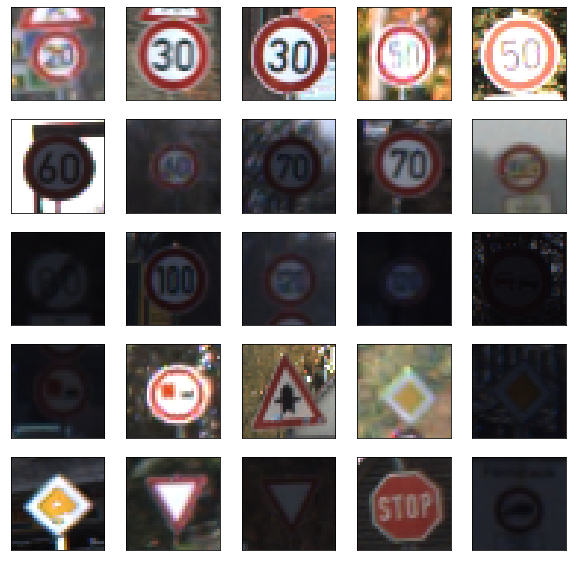

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i*1000], cmap=plt.cm.binary)
plt.show()

In [9]:
print(y_train[0])
print(y_train[10000])
print(y_train[20000])
# print(set(y_train)) there should be a total of 43 different labels, 0-42

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [10]:
from sklearn.model_selection import train_test_split

# the X_test doesn't have a corresponding "y_test" so we're just gonna split the X_train into a train and test set
actXTrain, actXTest, actYTrain, actYTest = train_test_split(X_train, y_train, test_size = 0.2)
print(actXTrain.shape)
print(actXTest.shape)
print(actYTrain.shape)
print(actYTest.shape)

(31367, 32, 32, 3)
(7842, 32, 32, 3)
(31367, 43)
(7842, 43)


In [11]:
# last layer is a softmax layer containing 
nnMod = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(43, activation=tf.nn.softmax)
])

# the loss function should be "categorical_crossentropy" since the labels aren't integer targets 
nnMod.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
nnMod.fit(actXTrain, actYTrain, epochs=15)

evalLoss, evalAcc = nnMod.evaluate(actXTest, actYTest)
print(f"Final Accuracy: {evalAcc}")

W0414 16:33:29.148903 140012506961664 deprecation.py:506] From /home/briannguyen/anaconda3/envs/sciKit_22/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/15
31367/31367 [==============================] - 2s 62us/sample - loss: 2.0172 - acc: 0.5080
Epoch 2/15
31367/31367 [==============================] - 2s 57us/sample - loss: 0.9734 - acc: 0.7665
Epoch 3/15
31367/31367 [==============================] - 2s 57us/sample - loss: 0.6805 - acc: 0.8360
Epoch 4/15
31367/31367 [==============================] - 2s 57us/sample - loss: 0.5370 - acc: 0.8683
Epoch 5/15
31367/31367 [==============================] - 2s 57us/sample - loss: 0.4531 - acc: 0.8862
Epoch 6/15
31367/31367 [==============================] - 2s 57us/sample - loss: 0.4046 - acc: 0.8985
Epoch 7/15
31367/31367 [==============================] - 2s 58us/sample - loss: 0.3580 - acc: 0.9109
Epoch 8/15
31367/31367 [==============================] - 2s 58us/sample - loss: 0.3274 - acc: 0.9182
Epoch 9/15
31367/31367 [==============================] - 2s 58us/sample - loss: 0.3116 - acc: 0.9216
Epoch 10/15
31367/31367 [==============================] - 2s 58us/sample - loss: 

In [13]:
preds = nnMod.predict(actXTest)


testNum = 0
print(f"The highest label probability for test sample {testNum} is {max(preds[testNum])} and it's predicted label is {np.argmax(preds[testNum])}")

print(f"These are all the probabilities for test sample {testNum}")                                                                                                               
print(preds[testNum])

The highest label probability for test sample 0 is 0.9999440908432007 and it's predicted label is 35
These are all the probabilities for test sample 0
[3.1863598e-16 3.3923961e-14 6.3611285e-15 5.5606368e-08 1.8524008e-16
 4.4125582e-11 7.6236047e-19 6.3970178e-16 6.8971177e-16 2.0129741e-05
 2.6570660e-10 5.0050796e-20 5.7972733e-09 3.4819441e-05 9.5017720e-21
 5.7693267e-11 1.9049218e-15 3.9992664e-20 1.9609492e-23 1.8594961e-11
 2.8413660e-10 1.0139638e-16 3.4263902e-12 9.4007944e-12 6.2005538e-17
 2.7174304e-11 1.9091830e-17 2.9418630e-20 3.9890894e-12 9.3534111e-13
 2.9983348e-17 8.8867640e-17 4.7698551e-12 7.1014500e-13 5.1687438e-10
 9.9994409e-01 9.7570671e-07 2.5429206e-14 3.8114689e-10 3.6773803e-17
 7.6299042e-15 8.0201901e-11 1.3680670e-13]


## Creating the submission file

In [17]:
submissPreds = nnMod.predict(X_test)

cols = [i for i in range(43)]
submissDF = pd.DataFrame(submissPreds, columns = cols)
submissDF.index.name = 'id'
submissDF

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,1.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
submissDF.to_csv ('./submission.csv', index = True)